In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

**<font size="6" color="red">ch01. NLTK 자연어처리 패키지</font>**
# <span>ch01. NLTK 자연어처리 패키지</span>
```

- 자연어처리 : 텍스트전처리, 단어의 빈도수 측정, 문사유사도 측정, 연관분석,
             워드임베딩, 텍스트분류, 어휘 데이터 베이스 사용, 감성분석, 분류분석
             
```
# NLTK 패키지
- 텍스트 전처리 : 토큰화(문장, 어절, 형태소 나누기), 정규표현식을 이용하여 불용어 처리, 어간추출
- 품사태깅 : 단어별 품사를 식별
- 어휘 데이터 베이스 사용
```
pip insrtall nltk == 3.7
```

In [1]:
import nltk

In [ ]:
import nltk
# c:/nltk_data, d:/nltk_data, e:/nltk_data,
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data,
# c:/Users/내컴퓨터이름/anaconda3/dhare/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/AppData/Roaming/nltk_data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# 오스틴 소설 엠마 내용 데이터 셋
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:30])

[Emma by Jane Austen 1816]

VO


In [4]:
# sent_tokenize() : 문장 단위로 쪼갠 list 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 :', len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 : 7456
'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'


In [5]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
word_tokenize(emma)

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [6]:
# RegexpTokenizer 클래스 : 토큰화할 때, 정규표현식
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\d+')
digits = ret.tokenize(emma)
print(digits)
ret1 = RegexpTokenizer('\w+')
words = ret1.tokenize(sent_tokens[0])
print(words)

['1816', '8', '23', '28', '28', '24', '7', '10', '000', '10', '000', '26']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 단위) 분석
cf. 자연어 처리의 기본은 형태소 분석과 품사태깅 - 어간추출(Stemming), 품사태깅(PosTagging)

In [7]:
words = ['sending', 'cooking','files','crying','dying']
# 어간 추출1 : Posterstemmer
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer
pst = PorterStemmer()
pst.stem(words[0], words[1])
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'cri', 'die']

In [8]:
# 어간 추출2 : LanscasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'cry', 'dying']

In [9]:
# 어간 추출3 : RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'cry', 'dy']

# 3. 품사 태깅

In [10]:
#print('품사태깅할 내용 : ', word_tokenize(sent_tokens[0]))

from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사태깅 결과 :', tagged_list)

품사태깅 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.')]


In [11]:
# 명사만 추출 : NN, NNS, NNP, NNPS
nouns_list = []
for word, tag in tagged_list:
    #if (tag=='NN') | (tag=='NNS') | (tag=='NNP') |(tag=='NNPS') :
    #if tag in ['NN', 'NNS', 'NNP', 'NNPS'] :
    if tag.find('NN') != -1:
        nouns_list.append(word)
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


In [12]:
nouns_list = [word for word, tag in tagged_list if tag.find('NN') != -1]
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


## Quiz. emma 소설안에서
1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오(RegexpTokenizer).
2. "Emma" 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사: NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력하시오

In [31]:
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer(r'\b\w{3,}\b')
digits = ret.tokenize(emma)
print(digits)


['Emma', 'Jane', 'Austen', '1816', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'unite', 'some', 'the', 'best', 'blessings', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'the', 'world', 'with', 'very', 'little', 'distress', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'the', 'two', 'daughters', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'consequence', 'her', 'sister', 'marriage', 'been', 'mistress', 'his', 'house', 'from', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'have', 'more', 'than', 'indistinct', 'remembrance', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'excellent', 'woman', 'governess', 'who', 'had', 'fallen', 'little', 'short', 'mother', 'affection', 'Sixteen', 'years', 'had', 'Miss', 'Taylor', 'been', 'Woodhouse', 'family', 'less', 'governess', 'than

In [28]:
from nltk.tag import pos_tag
tagged_list = pos_tag(digits)
for word, tag in tagged_list:
    if 'Emma' in word:
        print(word, tag)
        
        
#print('품사태깅 결과 :', tagged_list)

Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VBP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma JJ
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma JJ
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma NNP
Emma VB
Emma NNP
Emma NNP
Emma NNP
Emma N

In [54]:
Emma_Count = 0
for word, tag in tagged_list:
    if 'Emma' in word:
        Emma_Count += 1
print(Emma_Count)

865


In [53]:
NN = 0
NNS = 0
NNP = 0
NNPS = 0
for word, tag in tagged_list:
    if tag.find('NN') != -1:
        NN += 1
    if tag.find('NNS') != -1:
        NNS += 1
    if tag.find('NNP') != -1:
        NNP += 1
    if tag.find('NNPS') != -1:
        NNPS += 1
print(NN)
print(NNS)
print(NNP)
print(NNPS)


30781
3593
8634
26


In [41]:
#1.특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
tokenizer = RegexpTokenizer('\w{3,}')
emma_words = tokenizer.tokenize(emma)
emma_tags  = pos_tag(emma_words)
print('emma 소설의 글자 수 :', len(emma))
print('emma 소설의 3글자 이상의 단어 수 :', len(emma_words))
print(len(emma_tags))
print('단어의 종류 수 :', len(set(emma_words)), len(set(emma_tags)))
# 한 단어가 다른 품사로 태깅될 수 있다

emma 소설의 글자 수 : 887071
emma 소설의 3글자 이상의 단어 수 : 123877
123877
단어의 종류 수 : 7630 11678


# 4. 최빈 단어 시각화

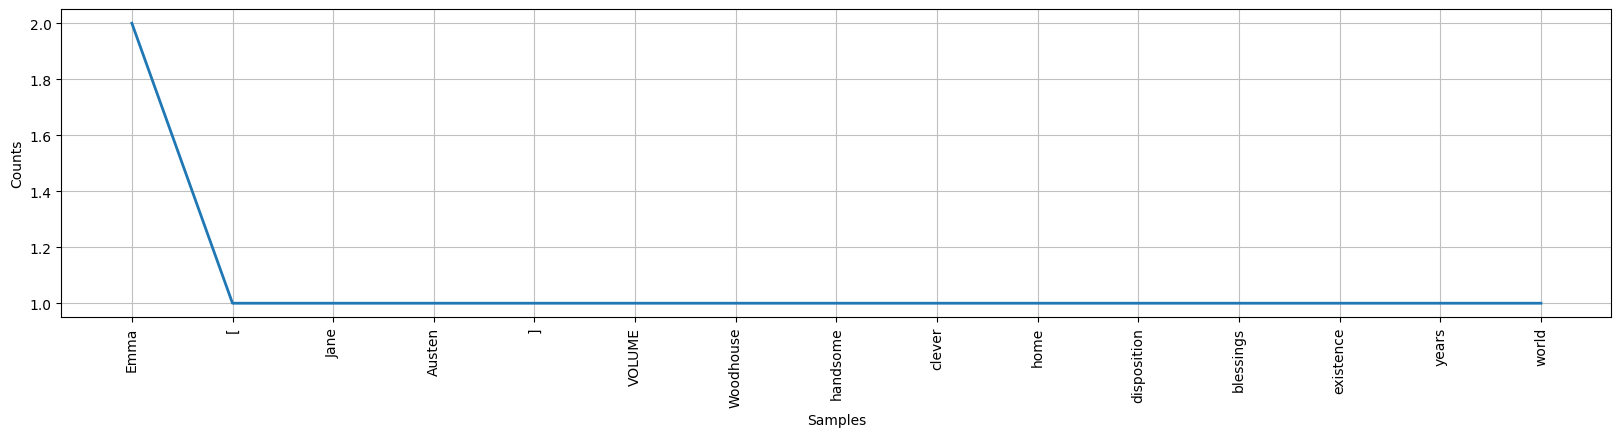

In [42]:

import matplotlib.pyplot as plt
# Text : 단어리스트와 관련된 빈도 분석이나 단어검색을 쉽게 할 수 있는 도구
from nltk import Text
plt.figure(figsize=(20,4))
emma_text = Text(nouns_list)
emma_text.plot(30)
plt.show()

In [43]:
emma_text.count('Emma')

2

In [46]:
emma_tags[:5]

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP')]

In [47]:
# 2."Emma" 단어가 몇번 등장했는지, 품사태깅이 Emma가 어떤 품사들로 되어 있는지 모두 출력
# pos = set() # Emma의 품사들
# cnt = 0 # Emma 등장 횟수
# for word, tag in emma_tags:
#     if word=='Emma':
#         cnt += 1
#         pos.add(tag)
tags = [tag for word, tag in emma_tags if word=='Emma']
cnt = len(tags)
pos = set(tags)
print('Emma 등장 횟수 :', cnt)
print('Emma가 분류된 품사 :', pos)

Emma 등장 횟수 : 865
Emma가 분류된 품사 : {'VB', 'NN', 'VBP', 'NNS', 'VBN', 'RB', 'NNPS', 'VBD', 'NNP', 'JJ'}


In [48]:
# Emma로 분류된 품사의 갯수를 sort 출력
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index=pos)
for word, tag in emma_tags:
    if word == 'Emma':
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False) #내림차순 정렬

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNS       2
NNPS      2
VBN       1
RB        1
VBD       1
dtype: int64

In [49]:

# 3.emma에서 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력
tags = ['NN', 'NNS', 'NNP', 'NNPS']
# nouns_list = []
# for token, tag in emma_tags:
#     if tag in tags:
#         nouns_list.append(token)
nouns_list = [token for token, tag in emma_tags if tag in tags]
print('명사가 등장할 횟수 :', len(nouns_list))
print('등장한 명사의 수(중복제거) :', len(set(nouns_list)))
print('한단어가 나오는 평균 빈도수 :', len(nouns_list)/len(set(nouns_list)))

명사가 등장할 횟수 : 30781
등장한 명사의 수(중복제거) : 4165
한단어가 나오는 평균 빈도수 : 7.3903961584633855


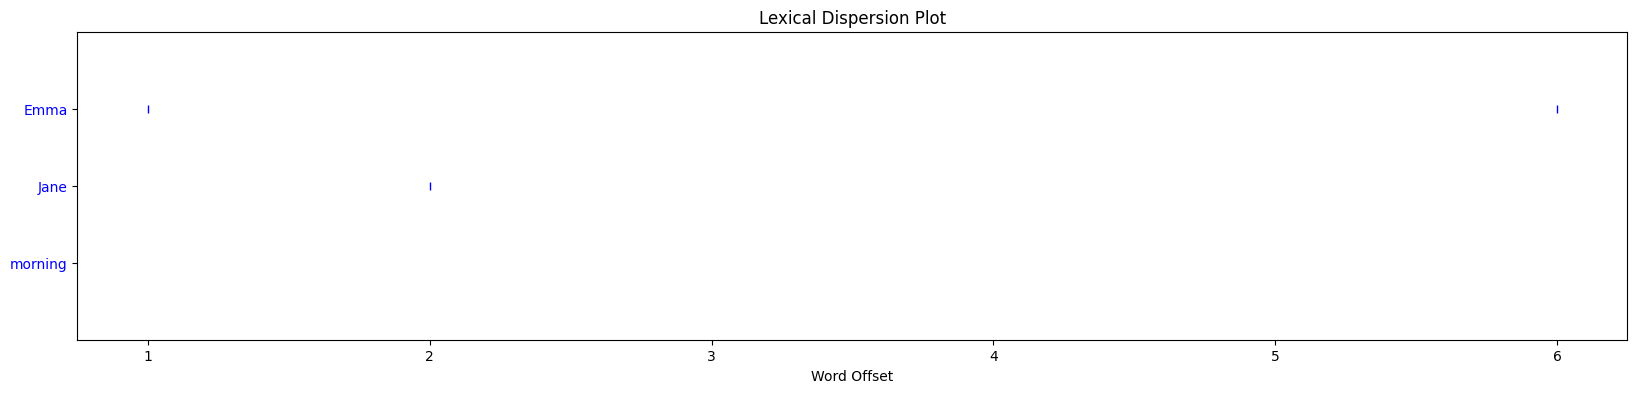

In [50]:
# 단어들이 텍스트 전체에서 어디에 나타나는지 시각적으로 보여주는 분산 그래프
plt.figure(figsize=(20,4))
emma_text.dispersion_plot(['Emma', 'Jane','morning'])

In [52]:

emma_text.count('Emma')

2